In [1]:
# !pip install scipy
# pip install scipy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy as sp

In [3]:
df = pd.read_csv('./clean-df.csv')

In [4]:
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,11.190476,8.703704,13495.0,Low,False,True,True,False
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,11.190476,8.703704,16500.0,Low,False,True,True,False
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,154,5000.0,12.368421,9.038462,16500.0,Medium,False,True,True,False
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,102,5500.0,9.791667,7.833333,13950.0,Low,False,True,True,False
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,115,5500.0,13.055556,10.681818,17450.0,Low,False,True,True,False


In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

## Analyzing individual features using Visualization

Understand the data types of the variable

In [5]:
df.dtypes

Unnamed: 0             int64
symboling              int64
normalized-losses      int64
make                  object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-L/100km         float64
highway-L/100km      float64
price                float64
horsepower-binned     object
fuel-type-diesel        bool
fuel-type-gas           bool
aspiration-std          bool
aspiration-turbo        bool
dtype: object

### Continuous numerical variables

In [6]:
df['peak-rpm'].dtype

dtype('float64')

We can find the correlation coefficient of numerical variables

In [7]:
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566903
stroke,-0.055390,1.000000,0.187871,0.098128
compression-ratio,0.001263,0.187871,1.000000,-0.214489
horsepower,0.566903,0.098128,-0.214489,1.000000


Using the seaborn regplot visualization, we can plot different variables against the 'prices' variable to see the correlation. The regplot visualization plots a scatterplot plus a fitted regression line for the data.

(0.0, 53297.50445245687)

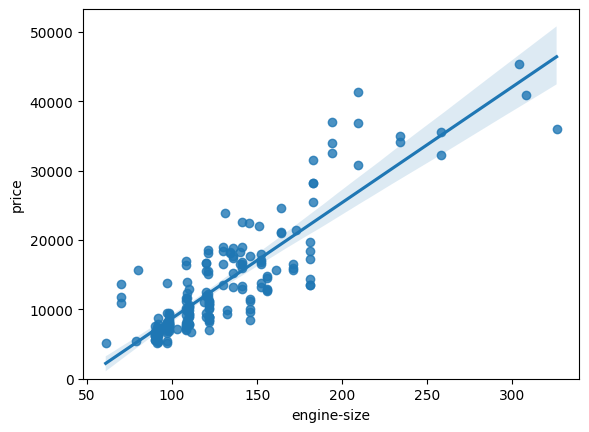

In [8]:
sns.regplot(x='engine-size', y='price', data=df)
plt.ylim(0,)

From the visualization above, we can see that as the engine size increases, the price increases. This indicates a positive direct correlation between these two variables.

We can see the correlation coefficient of these variables.

In [9]:
df[['engine-size', 'price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


In [10]:
print(df.columns)

Index(['Unnamed: 0', 'symboling', 'normalized-losses', 'make', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-L/100km', 'highway-L/100km', 'price',
       'horsepower-binned', 'fuel-type-diesel', 'fuel-type-gas',
       'aspiration-std', 'aspiration-turbo'],
      dtype='object')


(0.0, 47713.09531965549)

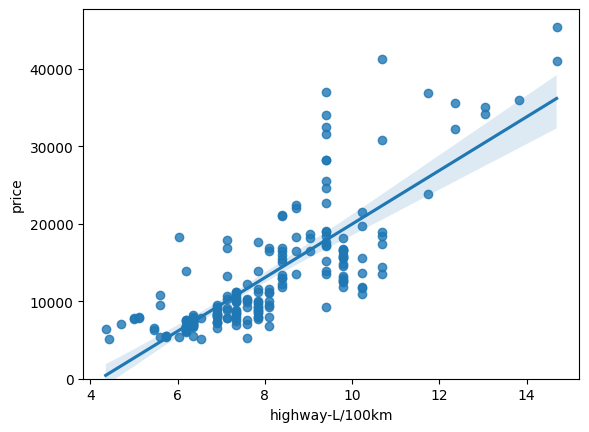

In [11]:
sns.regplot(x='highway-L/100km', y='price', data=df)
plt.ylim(0,)

In [12]:
df[['highway-L/100km', 'price']].corr()

,highway-L/100km,price
highway-L/100km,1.000000,0.801118
price,0.801118,1.000000


<Axes: xlabel='peak-rpm', ylabel='price'>

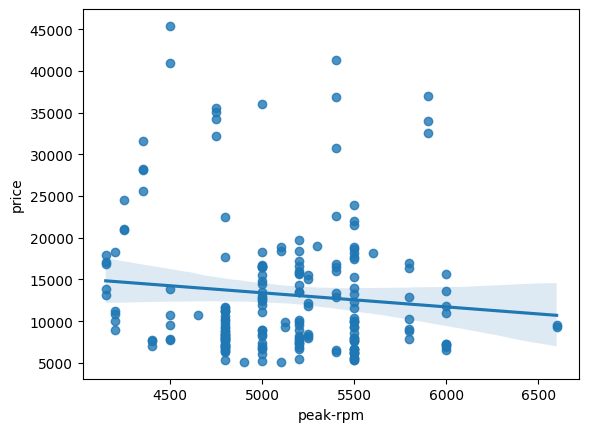

In [14]:
sns.regplot(x='peak-rpm', y='price', data=df)

From the visualization above, we can see that there is a weak linear relationship between 'peak-rpm' and 'price'. 

In [15]:
df[['peak-rpm', 'price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


<Axes: xlabel='stroke', ylabel='price'>

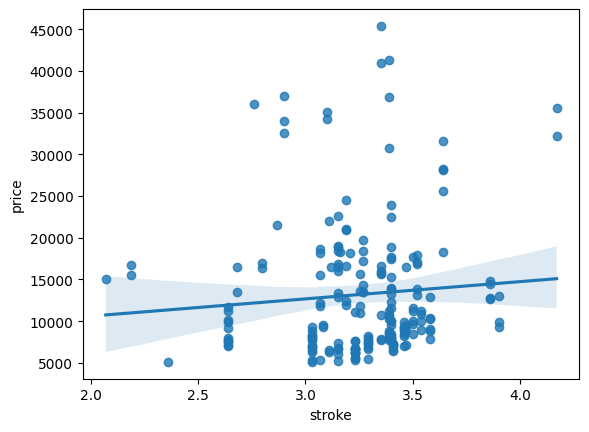

In [16]:
sns.regplot(x='stroke', y='price', data=df)

In [17]:
df[['stroke', 'price']].corr()

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


There is also a weak linear relationship between 'stroke' and 'price'. This means that 'peak-rpm' and 'stroke' are both unreliable variables to predict 'price'.

### Categorical variables

<Axes: xlabel='body-style', ylabel='price'>

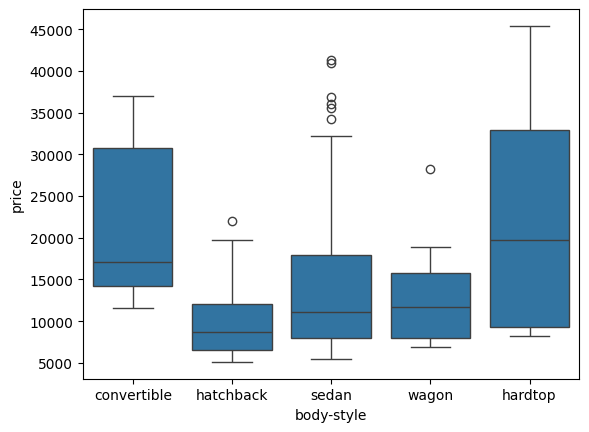

In [18]:
sns.boxplot(x='body-style', y='price', data=df)

There is significant overlap in the distribution of price between the diffrent body styles, so 'body-style' would not be a good predictor for price.

<Axes: xlabel='engine-location', ylabel='price'>

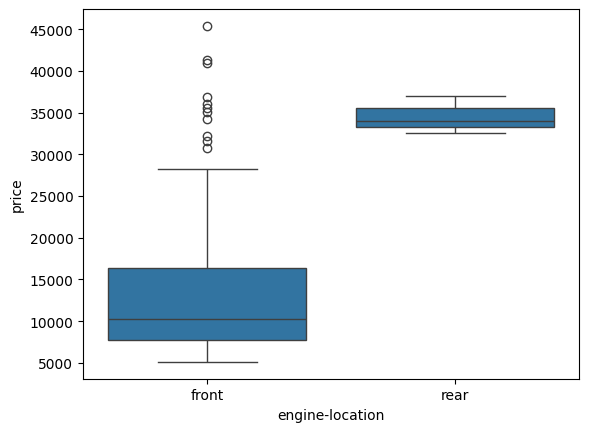

In [19]:
sns.boxplot(x='engine-location', y='price', data=df)

Here, the distribution of price for the two categories of engine location are distinct enough for it to be a good predictor for price.

<Axes: xlabel='engine-type', ylabel='price'>

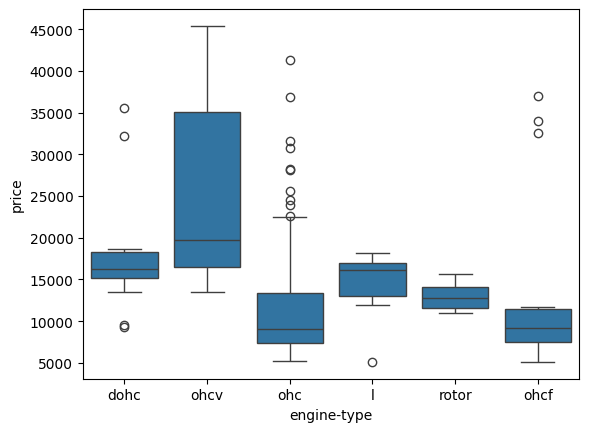

In [20]:
sns.boxplot(x='engine-type', y='price', data=df)

However, the distribution of price for the categories of engine type would not be a good predictor for price as they are is are significant overlaps.

<Axes: xlabel='drive-wheels', ylabel='price'>

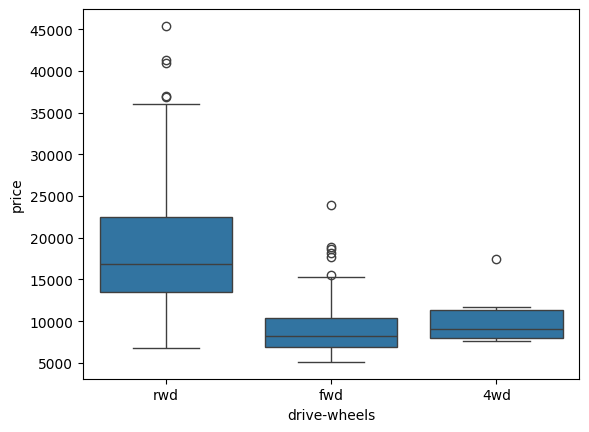

In [21]:
sns.boxplot(x='drive-wheels', y='price', data=df)

## Descriptive Statistical Analysis

#### .describe()
The .describe() function automatically computes basic statistics of the variables. By default, it computes only for numeric variables(int64 and float64).

In [26]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,10.164279,103.402985,5117.665368,9.944145,8.044957,13207.129353
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,4.004965,37.365650,478.113805,2.534599,1.840739,7947.066342
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,4.795918,4.351852,5118.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,7.833333,6.911765,7775.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,9.791667,7.833333,10295.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,12.368421,9.400000,16500.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,18.076923,14.687500,45400.000000


The .describe() function can be applied for type 'object' as follows:

In [27]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,115,94,118,198,145,157,92,153


#### .value_counts()

Helps understand the how many units of each variable available.

In [28]:
df['drive-wheels'].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

In [32]:
drive_wheel_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheel_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheel_counts

In [31]:
drive_wheel_counts.index.name = 'drive-wheels'
drive_wheel_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [35]:
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location':'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts

,count
engine-location,
front,198
rear,3


From this result, 'engine-location' will not be a good predictor of 'price' because there are only 3 cars with rear engine and 198 with front engine. This result is skewed and we are unable to draw any conclusions about the engine location.

## Basics of Grouping

The data is grouped based on one or several variables and analysis is performed on the individual groups.

In [36]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [50]:
df['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [45]:
group_0 = df[['drive-wheels',  'price']]

In [57]:
group_0 = group_0.groupby(['drive-wheels'], as_index=False).mean().sort_values(by=['price'], ascending=False)
group_0

,drive-wheels,price
2,rwd,19757.613333
0,4wd,10241.000000
1,fwd,9244.779661


In [40]:
group_1 = df[['drive-wheels', 'body-style', 'price']]
group_1

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


In [58]:
group_1 = group_1.groupby(['drive-wheels', 'body-style'], as_index=False).mean().sort_values(by=['drive-wheels', 'price'], ascending=False)
group_1

,drive-wheels,body-style,price
9,rwd,hardtop,24202.714286
8,rwd,convertible,23949.600000
11,rwd,sedan,21711.833333
12,rwd,wagon,16994.222222
10,rwd,hatchback,14337.777778
3,fwd,convertible,11595.000000
7,fwd,wagon,9997.333333
6,fwd,sedan,9811.800000
5,fwd,hatchback,8396.387755
4,fwd,hardtop,8249.000000


#### Pivot Table

In [59]:
grouped_piviot = group_1.pivot(index='drive-wheels', columns='body-style')
grouped_piviot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [60]:
grouped_piviot = grouped_piviot.fillna(0)
grouped_piviot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [61]:
group_2 = df[['body-style', 'price']]

In [65]:
group_2 = group_2.groupby(['body-style'], as_index=False).mean().sort_values(by='price', ascending=False)
group_2

,body-style,price
1,hardtop,22208.500000
0,convertible,21890.500000
3,sedan,14459.755319
4,wagon,12371.960000
2,hatchback,9957.441176


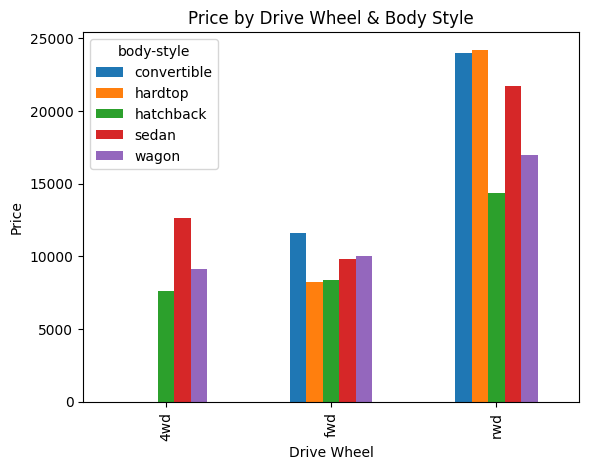

In [67]:
%matplotlib inline

grouped_piviot['price'].plot(kind='bar')
plt.xlabel('Drive Wheel')
plt.ylabel('Price')
plt.title('Price by Drive Wheel & Body Style')
plt.show()

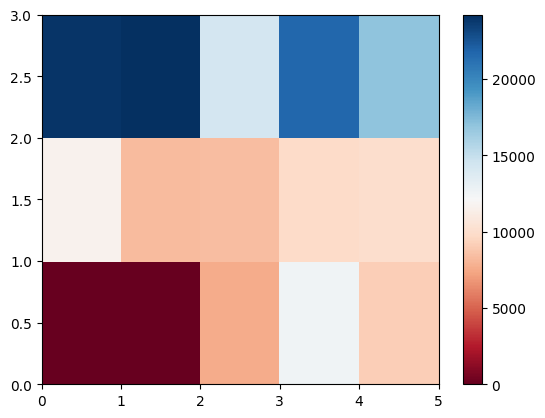

In [68]:
%matplotlib inline 

plt.pcolor(grouped_piviot, cmap='RdBu')
plt.colorbar()
plt.show()

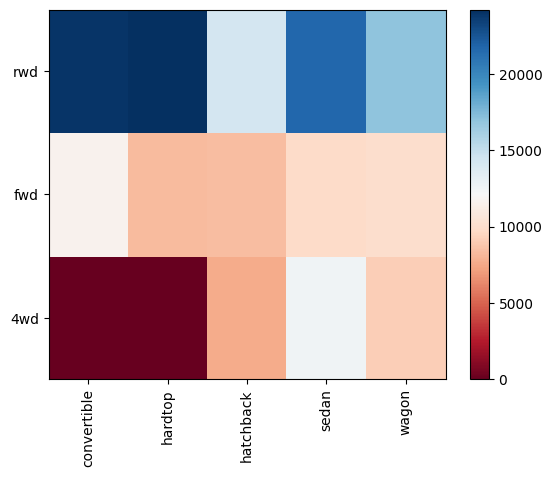

In [72]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_piviot, cmap='RdBu')

# label names
row_labels = grouped_piviot.columns.levels[1]
col_labels = grouped_piviot.index

# move ticks and labels to the center
ax.set_xticks(np.arange(grouped_piviot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_piviot.shape[0]) + 0.5, minor=False)

# insert labels 
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

# rotate the tick labels and set their alignment.
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()